## HW03 Code


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [2]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [3]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    
    
    for i in range(len(ytrue_N)):
        if ytrue_N[i] == 0 and yhat_N[i] == 0:
            TN += 1
        elif ytrue_N[i] == 0 and yhat_N[i] == 1:
            FP += 1
        elif ytrue_N[i] == 1 and yhat_N[i] == 0:
            FN += 1
        elif ytrue_N[i] == 1 and yhat_N[i] == 1:
            TP += 1
    return TP, TN, FP, FN

#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [4]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0.0, 0.0, 10.0, 0.0)

In [5]:
calc_TP_TN_FP_FN(all1, all0)

(0.0, 0.0, 0.0, 10.0)

In [6]:
calc_TP_TN_FP_FN(all1, all1)

(10.0, 0.0, 0.0, 0.0)

In [7]:
calc_TP_TN_FP_FN(all0, all0)

(0.0, 10.0, 0.0, 0.0)

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [8]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [9]:
prop_cancer_train = len([i for i in range(len(y_train)) 
                         if y_train[i] == 1]) / len(y_train)
prop_cancer_test  = len([i for i in range(len(y_test)) 
                         if y_test[i] == 1]) / len(y_test)

print("Fraction of data that has_cancer on TRAIN: %.3f" % prop_cancer_train)
print("fraction of data that has_cancer on TEST : %.3f" % prop_cancer_test)

Fraction of data that has_cancer on TRAIN: 0.140
fraction of data that has_cancer on TEST : 0.139


### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [10]:
from sklearn.metrics import accuracy_score as acc_score

# since there are no positives, just use negs
print("acc on TRAIN: %.3f" % acc_score(np.zeros(len(y_train)), y_train))
print("acc on TEST : %.3f" % acc_score(np.zeros(len(y_test)), y_test))

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [11]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, np.zeros(len(y_test))))

Predicted    0  1
True             
0          155  0
1           25  0


#### (c) Reflect on the accuracy of the always-0 classifier.

**Answer**: Though the always-0 classifier gives pretty decent accuracy, it's always pretty useless. The goal of the classifier is to indicate if a patient has cancer (1) or doesnt (0). If doctors see that the patient's data outputs a 0, they'll assume that the patient doesn't have cancer -- which is dangerous for the patient and doesn't help the doctor at all. In most classification problems where one class is rare (such as 1 in the data), the model will yield remarkably good results by placing all data in the dominant class, but that doesn't give the user any useful insight into patterns underlying the data. 

#### (d) Analyze the various costs of using the always-0 classifier.


**Answer**: This model will have a large cost in the form of misdiagnosis. If doctors use the prediction of this model as the sole scan for cancer, every patient that does actually have cancer is going to be misdiagnosed. With this comes the costs of...
- wasting time that could be spent on treatment
- if the cancer progress, wasting years that the individual could have had to live
- increased spending on more expensive cancer treatments later on
If I were in charge of making cancer prognoses, I would not recommend using this predictor because the false negative rate is far too high to be useful.

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [12]:
def normalize(x_data):
    x = x_data.copy()
    x = (x - x.min()) / (x.max() - x.min())
    return x

perceptron = sklearn.linear_model.Perceptron()
perceptron.fit(normalize(x_train), y_train)

y_train_predict = perceptron.predict(normalize(x_train))
y_test_predict = perceptron.predict(normalize(x_test))
print("acc on TRAIN: %.3f" % acc_score(y_train, y_train_predict))
print("acc on TEST : %.3f" % acc_score(y_test, y_test_predict))
print(calc_confusion_matrix_for_threshold(y_test, y_test_predict))

acc on TRAIN: 0.860
acc on TEST : 0.839
Predicted    0   1
True              
0          134  21
1            8  17


#### (b) Compare the `Perceptron` to the always-0 classifier.

**Answer**: 
The accuracy of the Perceptron is lower than the accuracy of the always-0 classifier: 0.839 vs. 0.861; however, accuracy shouldn't be the only factor used to evaluate these models. The always-0 classifier misdiagnoses 100% of patients with cancer, while the Perceptron misdiagnoses only 32% of patients with cancer. The Perceptron also misdiagnoses some patients that don't have cancer, but it's safer have more false positives and to run more tests than it is to let the cancer progress. So, the Perceptron is a more useful model than the always-0 classifier.

#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [13]:
train_accuracy_list = list()
test_accuracy_list = list()

# TODO: create, fit models here and record accuracy of each
alphas = np.logspace(-5, 5, base=10, num=100)

for a in alphas:
    perceptron = sklearn.linear_model.Perceptron(penalty='l2', alpha=a)
    perceptron.fit(normalize(x_train), y_train)
    y_train_predict = perceptron.predict(normalize(x_train))
    y_test_predict = perceptron.predict(normalize(x_test))
    
    train_accuracy_list.append(acc_score(y_train_predict, y_train))
    test_accuracy_list.append(acc_score(y_test_predict, y_test))

##### Plot accuracy on train/test data across the different alpha values.

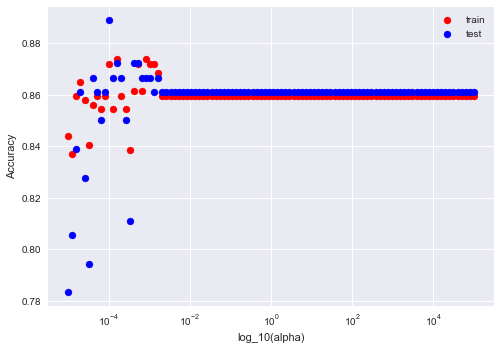

In [14]:
# TODO make plot
plt.scatter(alphas, train_accuracy_list, label='train', color='red')
plt.scatter(alphas, test_accuracy_list, label='test', color='blue')
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');
plt.xscale('log')

# TODO add legend, titles, etc.
plt.legend();

print()

#### (d) Discuss what the plot is showing you.

**Answer**: Starting with low alpha values, there's a lot of variablity in the accuracy of the model, especially for the test data. This is because the data is quite variable and isn't linearly separable, so increasing the strength of the penalty, which changes the classifier, will change the classification of lots of datum. Later on, at about log10(alpha) = 10^-3, the penalty for adjusting the diving line is high enough that the classifier defaults to the always-0 classifier, which, as previously discussed, doens't fulfill the goal of the model very well. And, to reiterate, the accuracy isn't the best metric with which to evaluate the efficacy of the model.

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [15]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.

perceptron = sklearn.linear_model.Perceptron()
perceptron = perceptron.fit(normalize(x_train), y_train)
perceptron_proba = perceptron.decision_function(normalize(x_test))
perceptron_discrete = perceptron.predict(normalize(x_test))


# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.


cv = sklearn.calibration.CalibratedClassifierCV(base_estimator=perceptron, method='isotonic')
cv = cv.fit(normalize(x_train), y_train)
cv_proba = cv.predict_proba(normalize(x_test))[:,1]  

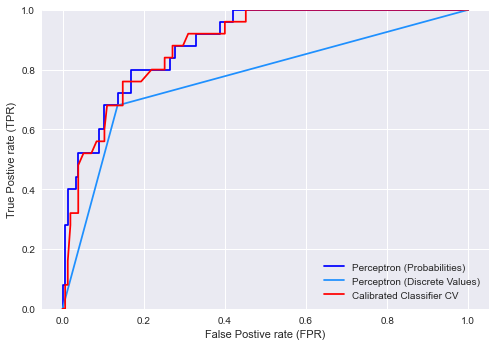

In [32]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)

fpr, tpr, thr = sklearn.metrics.roc_curve(y_test, perceptron_proba)
plt.plot(fpr, tpr, label='Perceptron (Probabilities)', color='blue')

fpr, tpr, thr = sklearn.metrics.roc_curve(y_test, perceptron_discrete)
plt.plot(fpr, tpr, label='Perceptron (Discrete Values)', color='dodgerblue')

fpr, tpr, thr = sklearn.metrics.roc_curve(y_test, cv_proba)
plt.plot(fpr, tpr, label='Calibrated Classifier CV', color='red')

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");
plt.legend();

In [17]:
print("AUC on TEST for Perceptron: %.3f" % sklearn.metrics.roc_auc_score(y_test, perceptron_proba))
print("AUC on TEST for probabilistic model: %.3f" % sklearn.metrics.roc_auc_score(y_test, cv_proba))

AUC on TEST for Perceptron: 0.891
AUC on TEST for probabilistic model: 0.885


#### (b) Discuss the results above

**Answer**: Overall, the perceptron does better. The AUC for the perceptron is slightly higher, which means that it has a smaller increase in false positives per increase in true positives (meaning fewer people without cancer are incorrectly told they have it). Additionally, for most values of TPR, the perceptron has a lower FPR.But in general, the models are pretty similar, which makes sense because the ClassifierCv uses the decision function of a perceptron for training.

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [18]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''
    pred_y = list()
    for i in yproba1_N:
        pred_y.append(1 if i > thresh else 0)
    
    TP, TN, FP, FN = calc_TP_TN_FP_FN(ytrue_N, pred_y)
    
    # TODO: fix this
    acc = acc_score(ytrue_N, pred_y)
    tpr = TP / (TP + FN) if (TP + FN > 0) else 0
    tnr =  TN / (TN + FP) if (TN + FP > 0) else 0
    ppv = TP / (TP + FP) if (TP + FP > 0) else 0
    npv = TN / (TN + FN) if (TN + FN > 0) else 0
    
    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [19]:
# TODO: test different thresholds to compute these values

best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

thresholds = np.linspace(0, 1.001, 51)
for i in range(len(thresholds)):
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, cv_proba, thresholds[i])
    if tpr >= best_TPR:
        best_TPR = tpr
        best_PPV_for_best_TPR = 0
        best_TPR_threshold = 0
    if tpr == best_TPR and ppv > best_PPV_for_best_TPR:
        best_PPV_for_best_TPR = ppv
        best_TPR_threshold = thresholds[i]
        
best_PPV = 0
best_TPR_for_best_PPV = 0  
best_PPV_threshold = 0

thresholds = np.linspace(0, 1.001, 51)
for i in range(len(thresholds)):
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, cv_proba, thresholds[i])
    if ppv >= best_PPV:
        best_PPV = ppv
        best_TPR_for_best_PPV = 0  
        best_PPV_threshold = 0
    if ppv == best_PPV and tpr >= best_TPR_for_best_PPV:
        best_TPR_for_best_PPV = tpr
        best_PPV_threshold = thresholds[i]

In [20]:
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

TPR threshold: 0.0601 => TPR: 1.0000; PPV: 0.2119
PPV threshold: 0.6607 => PPV: 0.7000; TPR: 0.2800


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [21]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, cv_proba, best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, cv_proba, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          149   6
1           14  11

0.889 ACC
0.440 TPR
0.961 TNR
0.647 PPV
0.914 NPV


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [22]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, cv_proba, best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, cv_proba, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0601

Predicted   0   1
True             
0          62  93
1           0  25

0.483 ACC
1.000 TPR
0.400 TNR
0.212 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [23]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, cv_proba, best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, cv_proba, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6607

Predicted    0  1
True             
0          152  3
1           18  7

0.883 ACC
0.280 TPR
0.981 TNR
0.700 PPV
0.894 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: If I were to use one of these thresholds, I would use the model with the lowest false negative rate. The threshold with the highest TPR also has the lowest FPR -- 0% on the test data -- meaning that anyone who gets a 0 doesn't have cancer, with no uncertainty. This model severly overestimates the number of people who have cancer, and thus has a low accuracy, but doens't risk patients going off falsely thinking they don't have cancer. The goal of this model is to reduce painful biopsies, and for 34% of patients this works. For the 51% of patients that get a positive but don't actually have cancer, it's better to be certain than to be misdiagnosed.
If we used a model with higher accuracy, there would be far more people who don't undergo biopsies but do actually have cancer, which is pretty scary -- it's far better to undergo a painful biopsy than to not know you have cancer.